In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor,
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [597]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [268]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [269]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [270]:
saleprice = train_data_copy['SalePrice']
train_data_copy = train_data_copy.drop(['SalePrice'],axis = 1)

In [271]:
df = [train_data_copy,test_data_copy]
all_data = pd.concat(df,axis = 0)


In [272]:
all_data.shape

(2919, 80)

In [273]:
all_data.select_dtypes(include=['object']).head(5)

MSZoning Street Alley LotShape  ... Fence MiscFeature SaleType SaleCondition
0       RL   Pave   NaN      Reg  ...   NaN         NaN       WD        Normal
1       RL   Pave   NaN      Reg  ...   NaN         NaN       WD        Normal
2       RL   Pave   NaN      IR1  ...   NaN         NaN       WD        Normal
3       RL   Pave   NaN      IR1  ...   NaN         NaN       WD       Abnorml
4       RL   Pave   NaN      IR1  ...   NaN         NaN       WD        Normal

[5 rows x 43 columns]

In [274]:
all_obj_data = all_data.select_dtypes(include=['object']).copy()

In [275]:
percent_missing = all_obj_data.isnull().sum() * 100 / len(all_obj_data)
#missing_value_df = pd.DataFrame({'column_name': all_obj_data.columns,'percent_missing': percent_missing})
#missing_value_df.sort_values('percent_missing', inplace=True)

In [276]:
percent_missing.sort_values(inplace=False)

SaleCondition     0.000000
CentralAir        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
RoofMatl          0.000000
HeatingQC         0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
RoofStyle         0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
LandContour       0.000000
LotShape          0.000000
PavedDrive        0.000000
Street            0.000000
Condition1        0.000000
Heating           0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
SaleType          0.034258
KitchenQual       0.034258
Electrical        0.034258
Utilities         0.068517
Functional        0.068517
MSZoning          0.137033
MasVnrType        0.822199
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtQual          2.774923
BsmtExposure      2.809181
BsmtCond          2.809181
GarageType        5.378554
GarageFinish      5.447071
GarageQual        5.447071
G

In [277]:
all_obj_data = all_obj_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis = 1)

In [278]:
for i in all_obj_data:
  all_obj_data[i] = all_obj_data[i].fillna(all_obj_data[i].mode()[0])

In [279]:
all_obj_data.loc[all_obj_data['Exterior1st'] == all_obj_data['Exterior2nd'],'Exterior'] = 1
all_obj_data.loc[all_obj_data['Exterior1st'] != all_obj_data['Exterior2nd'],'Exterior'] = 2
all_obj_data.loc[all_obj_data['Condition1'] == all_obj_data['Condition2'],'Condition'] = 1
all_obj_data.loc[all_obj_data['Condition1'] != all_obj_data['Condition2'],'Condition'] = 2
all_obj_data = all_obj_data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [280]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}


In [281]:
all_obj_data['Utilities'] = all_obj_data['Utilities'].map(utilities)
all_obj_data['HouseStyle'] = all_obj_data['HouseStyle'].map(housStyle)
all_obj_data['ExterQual'] = all_obj_data['ExterQual'].map(extraq)
all_obj_data['ExterCond'] = all_obj_data['ExterCond'].map(extraq)
all_obj_data['HeatingQC'] = all_obj_data['HeatingQC'].map(extraq)
all_obj_data['Electrical'] = all_obj_data['Electrical'].map(elec)
all_obj_data['KitchenQual'] = all_obj_data['KitchenQual'].map(extraq)
all_obj_data['BsmtQual'] = all_obj_data['BsmtQual'].map(bstmq)
all_obj_data['BsmtCond'] = all_obj_data['BsmtCond'].map(bstmq)
all_obj_data['BsmtExposure'] = all_obj_data['BsmtExposure'].map(bstmexp)
all_obj_data['BsmtFinType1'] = all_obj_data['BsmtFinType1'].map(bstmt1)
all_obj_data['BsmtFinType2'] = all_obj_data['BsmtFinType2'].map(bstmt1)
all_obj_data['GarageQual'] = all_obj_data['GarageQual'].map(bstmq)
all_obj_data['GarageCond'] = all_obj_data['GarageCond'].map(bstmq)

In [305]:
import operator
def count_encoding(data,i,var):
  if data[i].dtype == object or var == 'year':
    Mean_encoded_subject = data[i].value_counts().to_dict() 
    sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
    li = list(sorted_d)
    new_dict = {}
    for j in li:
      new_dict[j] = li.index(j)+1
    data[i] =  data[i].map(new_dict) 
  return data[i]

In [283]:
for i in all_obj_data:
  print(i,'\n',len(set(all_obj_data[i])),'\n',set(all_obj_data[i]))
  if len(set(all_obj_data[i])) >10:
    all_obj_data[i] = count_encoding(all_obj_data,i,'obj')

MSZoning 
 5 
 {'C (all)', 'RL', 'FV', 'RM', 'RH'}
Street 
 2 
 {'Pave', 'Grvl'}
LotShape 
 4 
 {'IR3', 'Reg', 'IR2', 'IR1'}
LandContour 
 4 
 {'Bnk', 'HLS', 'Lvl', 'Low'}
Utilities 
 2 
 {2, 4}
LotConfig 
 5 
 {'Inside', 'FR3', 'FR2', 'CulDSac', 'Corner'}
LandSlope 
 3 
 {'Gtl', 'Mod', 'Sev'}
Neighborhood 
 25 
 {'NPkVill', 'OldTown', 'Mitchel', 'Timber', 'BrkSide', 'SawyerW', 'Blmngtn', 'IDOTRR', 'Sawyer', 'Somerst', 'NridgHt', 'Crawfor', 'Veenker', 'MeadowV', 'CollgCr', 'SWISU', 'Edwards', 'ClearCr', 'NAmes', 'StoneBr', 'NWAmes', 'Blueste', 'Gilbert', 'BrDale', 'NoRidge'}
BldgType 
 5 
 {'Twnhs', 'TwnhsE', 'Duplex', '2fmCon', '1Fam'}
HouseStyle 
 8 
 {1.0, 2.0, 3.0, 1.5, 1.25, 3.5, 2.25, 2.5}
RoofStyle 
 6 
 {'Mansard', 'Flat', 'Gable', 'Hip', 'Gambrel', 'Shed'}
RoofMatl 
 8 
 {'WdShngl', 'ClyTile', 'Roll', 'WdShake', 'Membran', 'Metal', 'Tar&Grv', 'CompShg'}
MasVnrType 
 4 
 {'BrkCmn', 'None', 'Stone', 'BrkFace'}
ExterQual 
 4 
 {2, 3, 4, 5}
ExterCond 
 5 
 {1, 2, 3, 4, 5}
Foundati

In [284]:
temp = all_obj_data.copy()
for i in temp:
  if temp[i].dtype == object:
    a = pd.get_dummies(temp[i],drop_first=True)
    all_obj_data = pd.concat([all_obj_data,a],axis = 1)
    all_obj_data = all_obj_data.drop([i],axis = 1)

In [285]:
all_obj_data.head(5)

Utilities  Neighborhood  HouseStyle  ...  Family  Normal  Partial
0          4            24         2.0  ...       0       1        0
1          4             3         1.0  ...       0       1        0
2          4            24         2.0  ...       0       1        0
3          4            13         2.0  ...       0       0        0
4          4            10         2.0  ...       0       1        0

[5 rows x 92 columns]

In [286]:
all_float_data = all_data.select_dtypes(include=['float64']).copy()

In [287]:
percent_missing = all_float_data.isnull().sum() * 100 / len(all_float_data)

In [288]:
percent_missing.sort_values(inplace=False)

BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
MasVnrArea       0.787941
GarageYrBlt      5.447071
LotFrontage     16.649538
dtype: float64

In [289]:
for i in all_float_data:
  all_float_data[i] = all_float_data[i].fillna(all_float_data[i].mean())

In [290]:
all_int_data = all_data.select_dtypes(include=['int64']).copy()

In [291]:
percent_missing = all_int_data.isnull().sum() * 100 / len(all_int_data)
percent_missing.sort_values(inplace=False)

Id               0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
Fireplaces       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
LotArea          0.0
MSSubClass       0.0
MoSold           0.0
YrSold           0.0
dtype: float64

In [298]:
clear_data = pd.concat([all_obj_data,all_float_data,all_int_data],axis = 1)

In [306]:
lii = ['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt']
#lii = ['GarageYrBlt','YearBuilt','YearRemodAdd']
for i in lii:
  clear_data[i] = count_encoding(clear_data,i,'year')

In [307]:
clear_data.head(5)

Utilities  Neighborhood  HouseStyle  ...  MiscVal  MoSold  YrSold
0          4            24         2.0  ...        0       3       3
1          4             3         1.0  ...        0      10       5
2          4            24         2.0  ...        0       5       3
3          4            13         2.0  ...        0       3       2
4          4            10         2.0  ...        0       1       3

[5 rows x 129 columns]

In [308]:
temp = clear_data.copy()

In [706]:
te = temp.iloc[1460:, :]
tr = temp.iloc[:1460, :]

In [708]:
tr = tr.loc[:,~tr.columns.duplicated()]
te = te.loc[:,~te.columns.duplicated()]

In [702]:
tr['SalePrice'] = saleprice

In [707]:
tr.head(2)

Utilities  Neighborhood  HouseStyle  ...  MiscVal  MoSold  YrSold
0          4            24         2.0  ...        0       3       3
1          4             3         1.0  ...        0      10       5

[2 rows x 129 columns]

In [536]:
all_col = tr.columns
final_col = []
for i in tr:
  #print(i)
  #print(tr['SalePrice'].corr(tr[i]))# or tr['SalePrice'].corr(tr[i])<=-.5
  if (tr['SalePrice'].corr(tr[i]))>=.5 or tr['SalePrice'].corr(tr[i])<=-.5:
    final_col.append(i)

In [538]:
tr = tr.filter(final_col,axis = 1)
te = te.filter(final_col,axis = 1)

In [456]:
#ovr = tr['OverallQual']
tr = tr.drop(['TotRmsAbvGrd'],axis = 1)

In [540]:
tr = tr.drop(['ExterQual','OverallQual','KitchenQual','GrLivArea','FullBath','GarageCars','1stFlrSF'],axis = 1)#'GrLivArea','FullBath',

In [541]:
te = te.filter(tr.columns,axis = 1)
te.shape

(1459, 5)

In [709]:
te.shape

(1459, 125)

In [466]:
cols

Index(['SalePrice', 'GarageArea', 'TotalBsmtSF', 'BsmtQual', 'TotRmsAbvGrd',
       'Unf'],
      dtype='object')

In [543]:
import scipy.stats as stats

In [710]:
x = train_data['SalePrice']
x1 = np.log(train_data['SalePrice']+1)
#x2 = 1/(train_data['SalePrice']+1)
x3 = (train_data['SalePrice'])**(1/2)
x4 = 1/(train_data['SalePrice'])**(1/5)
x5,l = stats.boxcox(train_data['SalePrice']+1)

In [711]:
train_log_data = pd.DataFrame()
test_log_data = pd.DataFrame()
train_rec_data = pd.DataFrame()
test_rec_data = pd.DataFrame()
train_sqr_data = pd.DataFrame()
test_sqr_data = pd.DataFrame()
train_exp_data = pd.DataFrame()
test_exp_data = pd.DataFrame()
train_box_data = pd.DataFrame()
test_box_data = pd.DataFrame()

In [715]:
for i in tr:
  if i!='SalePrice':
    train_log_data[i] = np.log(tr[i]+1)
    test_log_data[i] = np.log(te[i]+1)
    train_rec_data[i] = 1/(tr[i]+1)
    test_rec_data[i] = 1/(te[i]+1)
    train_sqr_data[i] = (tr[i]+1)**(1/2)
    test_sqr_data[i] = (te[i]+1)**(1/2)
    train_exp_data[i] = 1/(tr[i]+1)**(1/5)
    test_exp_data[i] = 1/(te[i]+1)**(1/5)
    #train_box_data[i],q = stats.boxcox(tr[i]+1)
    #test_box_data[i],qq = stats.boxcox(te[i]+1)
    #b = pd.DataFrame(b)


In [ ]:
print('normal vs normal: -> ',x.corr(a1))
print('normal vs log: -> ',x.corr(lo))
print('normal vs rec: -> ',x.corr(r))
print('normal vs sqr: -> ',x.corr(s))
print('normal vs exp: -> ',x.corr(e))
#print('normal vs box: -> ',x.corr(b))
print()
print('log vs normal: -> ',x1.corr(a1))
print('log vs log: -> ',x1.corr(lo))
print('log vs rec: -> ',x1.corr(r))
print('log vs sqr: -> ',x1.corr(s))
print('log vs exp: -> ',x1.corr(e))
#print('normal vs box: -> ',x.corr(b))
print()
'''
print('rec vs normal: -> ',x2.corr(a1))
print('rec vs log: -> ',x2.corr(lo))
print('rec vs rec: -> ',x2.corr(r))
print('rec vs sqr: -> ',x2.corr(s))
print('rec vs exp: -> ',x2.corr(e))
#print('normal vs box: -> ',x.corr(b))
'''
print()
print('sqr vs normal: -> ',x3.corr(a1))
print('sqr vs log: -> ',x3.corr(lo))
print('sqr vs rec: -> ',x3.corr(r))
print('sqr vs sqr: -> ',x3.corr(s))
print('sqr vs exp: -> ',x3.corr(e))
#print('normal vs box: -> ',x.corr(b))
print()
print('exp vs normal: -> ',x4.corr(a1))
print('exp vs log: -> ',x4.corr(lo))
print('exp vs rec: -> ',x4.corr(r))
print('exp vs sqr: -> ',x4.corr(s))
print('exp vs exp: -> ',x4.corr(e))
#print('normal vs box: -> ',x.corr(b))

In [ ]:
s = (tr['GarageArea']+1)**(1/2)
s = (tr['TotalBsmtSF']+1)**(1/2)
lo = np.log(tr['BsmtQual']+1)

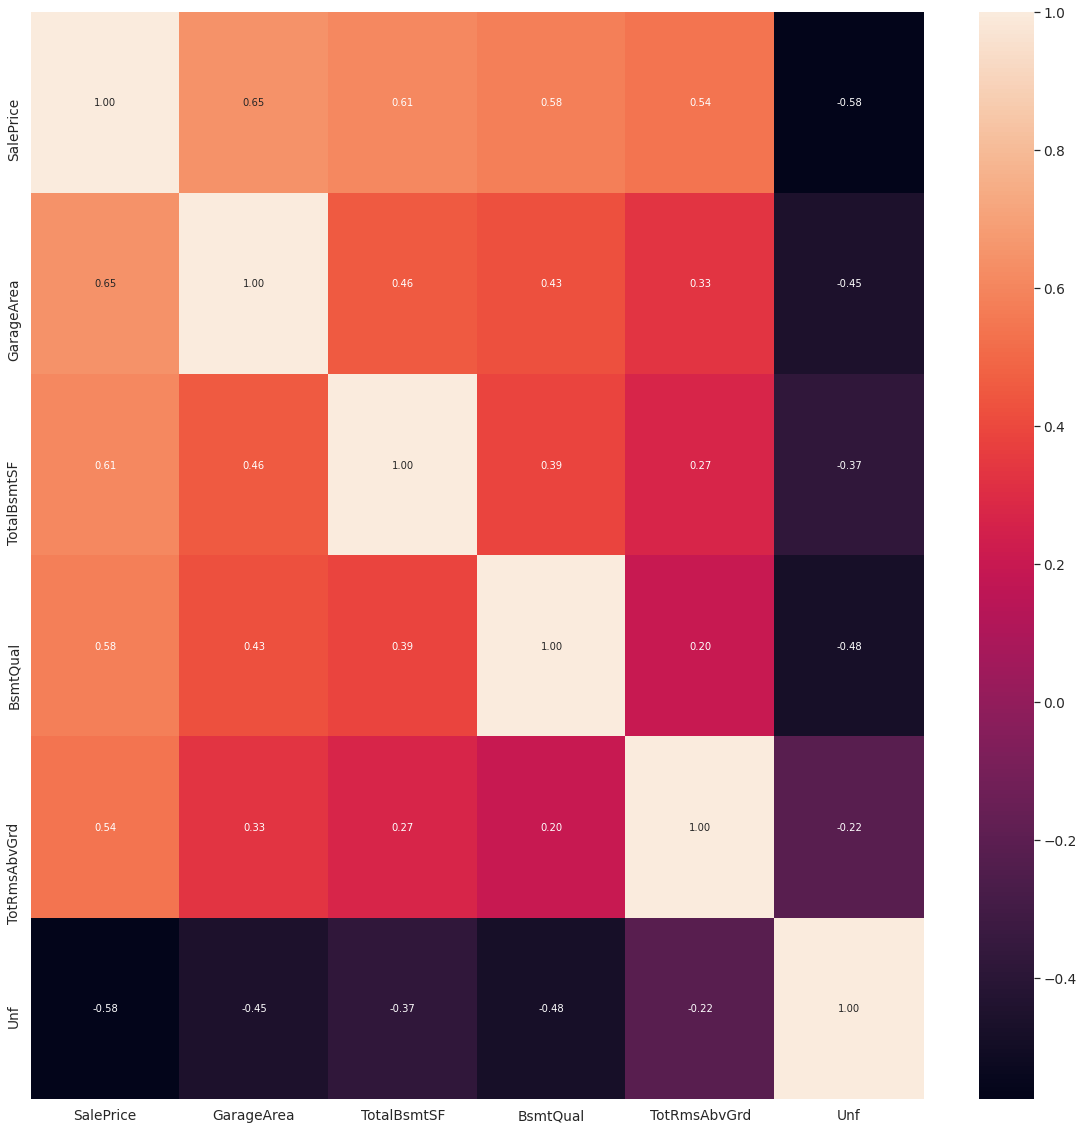

In [592]:
train_box_data['SalePrice'] = x5
f,ax = plt.subplots(figsize=(20, 20))
corrmat = train_box_data.corr()
k =30
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_box_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

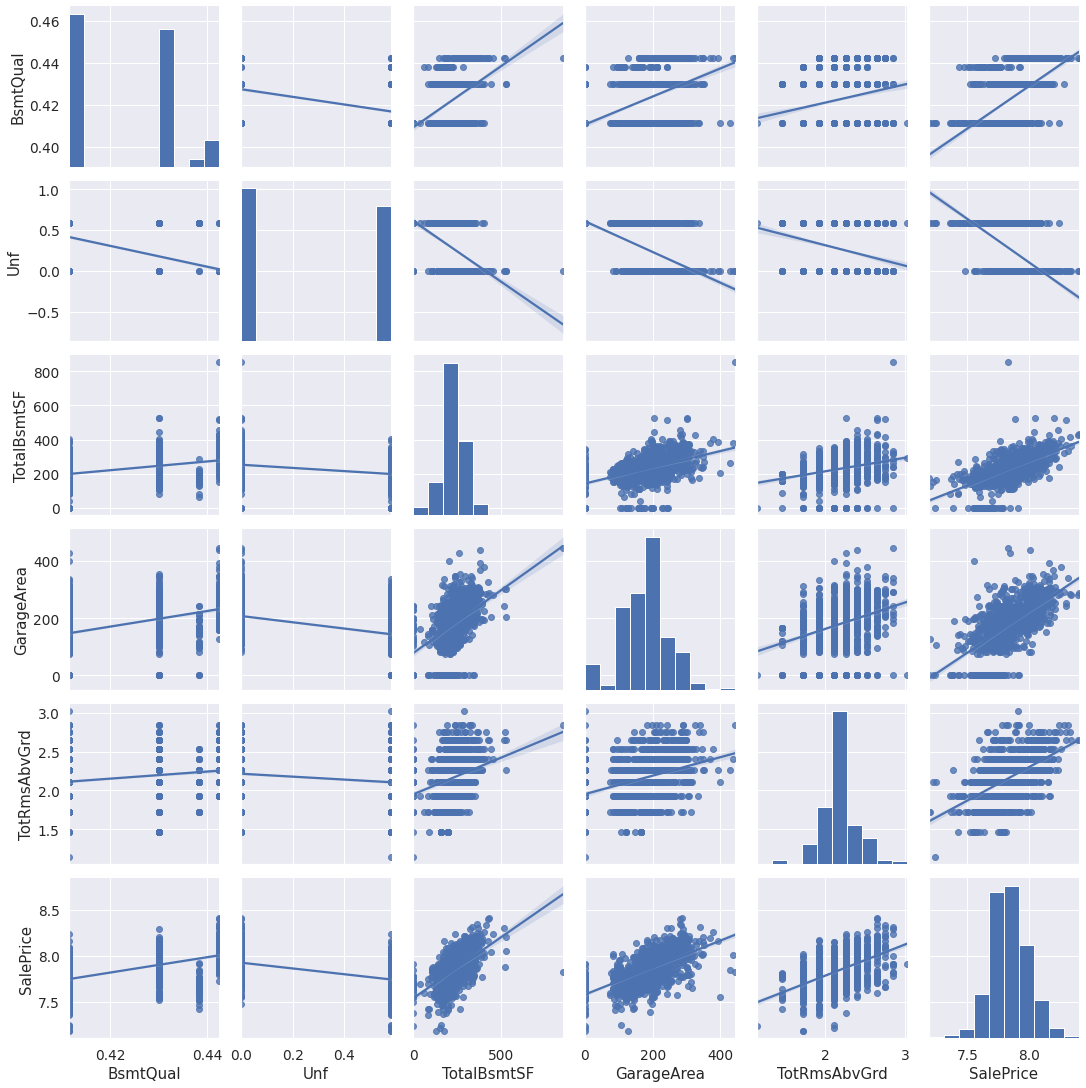

In [593]:
sns.pairplot(train_box_data,kind="reg")

In [716]:
train_sqr_data['SalePrice'] = x3

In [690]:
train_box_data

BsmtQual      Unf  TotalBsmtSF  GarageArea  TotRmsAbvGrd  SalePrice
0     0.430084  0.00000   198.284295  204.517915      2.402306   7.932275
1     0.430084  0.00000   264.601145  177.329636      2.105656   7.877933
2     0.430084  0.00000   209.206786  222.579733      2.105656   7.959279
3     0.411479  0.58225   180.779930  232.664362      2.262532   7.774635
4     0.430084  0.00000   246.150776  288.451992      2.528459   8.002531
...        ...      ...          ...         ...           ...        ...
1455  0.430084  0.00000   214.761031  177.329636      2.262532   7.863547
1456  0.430084  0.58225   307.053998  189.799299      2.262532   7.935068
1457  0.411479  0.00000   247.268017  108.514130      2.528459   8.027036
1458  0.411479  0.58225   235.365160  104.271956      1.926628   7.780686
1459  0.411479  0.00000   263.666126  116.887039      2.105656   7.795566

[1460 rows x 6 columns]

In [717]:
y = train_sqr_data['SalePrice']
train = train_sqr_data.drop(['SalePrice'],axis = 1)

In [718]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)

In [719]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

91.76881431291413


32692.370436137197

In [721]:
passref = PassiveAggressiveRegressor(max_iter=100000,early_stopping=False,n_iter_no_change=100,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

86.17133500998906


773.685179176835

In [722]:
drt =DecisionTreeRegressor(criterion='mse',max_depth=10,ccp_alpha=0.00000005)
drt.fit(X_train, y_train)
rms = drt.score(X_train, y_train)
print(rms*100)
y_pred = drt.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

98.566677964996


2580.8738278813757

In [629]:
from scipy.special import boxcox, inv_boxcox

In [726]:
y_pred = drt.predict(test_sqr_data)

In [724]:
y_pred = inv_boxcox(y_pred, l)

In [729]:
y_pred = (y_pred)**2

In [730]:
y_pred

array([218276.20126246, 187642.92156933, 102076.98341254,  74031.06579649,
       134114.88990629, 333086.60442543, 281977.07628298, 137205.36900747,
       216137.73085646, 253672.71823391, 193474.30891104,  33801.89806239,
       208320.0717716 , 414869.84331594, 239537.38343614, 112865.33208338,
       102137.2608958 , 115489.96565003, 170382.68498602, 122859.81163439,
       121403.61499236, 153280.00540051, 231758.59076247, 346130.3590785 ,
        95380.64642258, 224663.98344335, 126240.1531288 , 169611.65310655,
       426892.72485804, 122150.03612722, 136657.88186864, 121657.40949953,
       118051.34644224,  85048.77946191, 159864.49769599, 329696.7887019 ,
       132806.00331217,  90061.43842408, 256943.03356009, 118354.29220784,
       138000.32744263, 146133.73038891,  95706.03375452, 121289.90378156,
       160689.95957639, 184125.53636305, 124472.53107947, 190766.45087487,
       226702.71668454, 279636.75681449,  86721.49353802, 294276.17241186,
       106825.2012209 , 2

In [728]:
from sklearn import linear_model
drt = linear_model.Lasso(alpha=0.0000002)
drt.fit(X_train, y_train)
rms = drt.score(X_train, y_train)
print(rms*100)
y_pred = drt.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

91.76881430871671


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343764.12362298975, tolerance: 836.2572395189704
  positive)


1705.7568189908475

In [659]:
y_pred = drt.predict(test_box_data)
y_pred = inv_boxcox(y_pred, l)
y_pred

array([142198.68883204,  60001.        , 140893.32062458, ...,
       210001.        , 179001.        , 193594.11473413])

In [731]:
drt = GradientBoostingRegressor(loss='ls', learning_rate=0.8,criterion='mse', max_depth=4,)
drt.fit(X_train, y_train)
rms = drt.score(X_train, y_train)
print(rms*100)
y_pred = drt.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

99.96356104129147


1501.1159691788716

In [672]:
y_pred = drt.predict(test_box_data)
y_pred = inv_boxcox(y_pred, l)
y_pred

array([152549.03044794, 250467.25581217, 167976.01546644, ...,
       207904.46908764, 119435.02150106, 215035.57632709])

In [673]:
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/.94.csv", index=False)

In [375]:
final_col

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'Unf',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'OverallQual',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'SalePrice']

In [416]:
temp1 = tr.copy()
for i in temp1:
  if i != 'SalePrice':
    for j in tr:
      if j != 'SalePrice':
        if temp1[i].corr(tr[j]) >=.5 or temp1[i].corr(tr[j]) <=-.5:
          tr = tr.drop([i],axis = 1)
          break

In [417]:
tr

SalePrice
0     12.247694
1     12.109011
2     12.317167
3     11.849398
4     12.429216
...         ...
1455  12.072541
1456  12.254863
1457  12.493130
1458  11.864462
1459  11.901583

[1460 rows x 1 columns]

In [316]:
#t = tr['BsmtQual'] + tr['BsmtCond'] + tr['BsmtExposure'] + tr['BsmtFinType1'] + tr['BsmtFinType2'] + tr['BsmtFinSF1'] + tr['BsmtFinSF2'] + tr['BsmtUnfSF'] + tr['TotalBsmtSF'] + tr['BsmtFullBath'] + tr['BsmtHalfBath'] 
#print(tr['SalePrice'].corr(t))

0.017827699155671207


In [293]:
df = all_data.copy()

In [294]:
df1 = df.iloc[1460:, :]
df2 = df.iloc[:1460, :]

In [295]:
df2.shape

(1460, 80)

In [296]:
df2.head(5)

Id  MSSubClass MSZoning  LotFrontage  ...  MoSold YrSold SaleType SaleCondition
0   1          60       RL         65.0  ...       2   2008       WD        Normal
1   2          20       RL         80.0  ...       5   2007       WD        Normal
2   3          60       RL         68.0  ...       9   2008       WD        Normal
3   4          70       RL         60.0  ...       2   2006       WD       Abnorml
4   5          60       RL         84.0  ...      12   2008       WD        Normal

[5 rows x 80 columns]

In [297]:
train_data.head(5)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]